# Decision tree

- Phân nhánh dữ liệu thành các nhánh đến khi gặp một điều kiện nào đó
- Khắc phục nhược điểm của KNN là tốn nhiều thời gian đối với dữ liệu lớn
- Purity: dataset thuần khiết, kết quả chỉ thuộc về 1 lớp
- Dựa trên chỉ số Gini để xây dựng cây quyết định, để tránh trường hợp bị overfitting thì ta cần quy định giới hạn dừng khi xây dựng cây hoặc có thể pruning để hạn chế overfitting


## Root Node

- Gini: chọn min $\to$ purity
- Entropy: chọn information gain max


## Decision tree with Gini

$$ Gini (D) =  1 - \sum_{i = 1}^{k}p_{i}^{2} $$

If a data set D is split on an attribute A into two subsets $D_1$ and $D_2$ with sizes $n_1$ and $n_2$, respectively, the Gini Impurity can be defined as:

$$ Gini_A(D) = \frac{n_1}{n}Gini(D_1) +  \frac{n_2}{n}Gini(D_2)  $$


## Decision tree with Entropy

- Entropy dựa vào log để hợp thức hoá độ dài khoảng cách theo số lần của các đối tượng khác nhau, chiếu sang dạng 1 trục số khác theo đúng tỷ lệ như ngôn ngữ nói
- Entropy là trung bình độ ngạc nhiên khi 1 sự kiện xảy ra
- Tính độ ngạc nhiên $S = log_2(\frac{1}{P})$
- Log base 2
- Information gain là từ 1 vấn đề có độ ngạc nhiên cao chuyển về độ ngạc nhiên thấp do được cung cấp nhiều thông tin $\to$ max information gain

$$ E = - \sum_{i =1}^{N}p_ilog_2p_i $$

$$Information\ gain:\ IG(S, F) = E(S) - \sum_{f \in F} \frac{|S_f|}{|S|}E(S_f)$$

- Tính toán tất cả các feature để tìm root node thông qua IG max
- Lặp lại quá trình để chia thành cây nhị phân phân chia dữ liệu

## Example

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

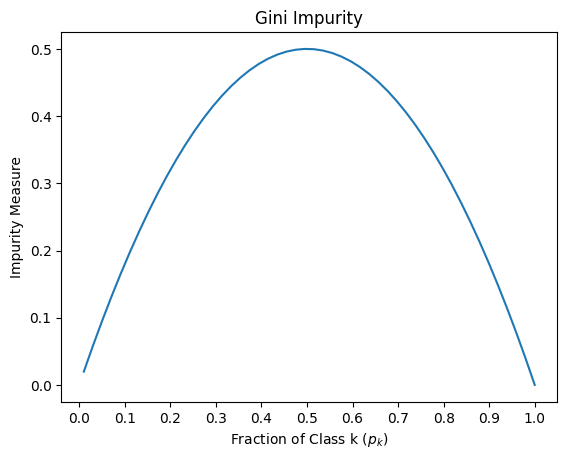

In [2]:
# Visualizing Gini Impurity range
# A figure is created to show Gini ımpurity measures
plt.figure()
x = np.linspace(0.01,1)
y = 1 - (x*x) - (1-x)*(1-x)
plt.plot(x,y)
plt.title('Gini Impurity')
plt.xlabel("Fraction of Class k ($p_k$)")
plt.ylabel("Impurity Measure")
plt.xticks(np.arange(0,1.1,0.1))

plt.show()

In [3]:
# Defining a simple dataset
attribute_names =  ['age', 'income','student', 'credit_rate']
class_name = 'default'
data1 ={
    'age' : ['youth', 'youth', 'middle_age', 'senior', 'senior', 'senior','middle_age', 'youth', 'youth', 'senior', 'youth', 'middle_age','middle_age', 'senior'],
    'income' : ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium','low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student' : ['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no'],
    'credit_rate' : ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair','excellent', 'excellent', 'fair', 'excellent'],
    'default' : ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes','yes', 'yes', 'yes', 'no']
}
df1 = pd.DataFrame (data1, columns=data1.keys())
print(df1)

           age  income student credit_rate default
0        youth    high      no        fair      no
1        youth    high      no   excellent      no
2   middle_age    high      no        fair     yes
3       senior  medium      no        fair     yes
4       senior     low     yes        fair     yes
5       senior     low     yes   excellent      no
6   middle_age     low     yes   excellent     yes
7        youth  medium      no        fair      no
8        youth     low     yes        fair     yes
9       senior  medium     yes        fair     yes
10       youth  medium     yes   excellent     yes
11  middle_age  medium      no   excellent     yes
12  middle_age    high     yes        fair     yes
13      senior  medium      no   excellent      no


In [4]:
# STEP 1: Calculate gini(D)
def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n )
    gini = 1 - p_sum
    return gini

class_value_counts = df1[class_name].value_counts()
print(f'Number of samples in each class is:\n{class_value_counts}')

gini_class = gini_impurity(class_value_counts)
print(f'\nGini Impurity of the class is {gini_class:.3f}')

Number of samples in each class is:
default
yes    9
no     5
Name: count, dtype: int64

Gini Impurity of the class is 0.459


In [5]:
# STEP 2:
# Calculating  gini impurity for the attiributes
def gini_split_a(attribute_name):
    attribute_values = df1[attribute_name].value_counts()
    gini_A = 0
    for key in attribute_values.keys():
        df_k = df1[class_name][df1[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = df1.shape[0]
        gini_A = gini_A + (( n_k / n) * gini_impurity(df_k))
    return gini_A

gini_attiribute ={}
for key in attribute_names:
    gini_attiribute[key] = gini_split_a(key)
    print(f'Gini for {key} is {gini_attiribute[key]:.3f}')

Gini for age is 0.343
Gini for income is 0.440
Gini for student is 0.367
Gini for credit_rate is 0.429


In [6]:
# STEP 3:
# Compute Gini gain values to find the best split
# An attribute has maximum Gini gain is selected for splitting.

min_value = min(gini_attiribute.values())
print('The minimum value of Gini Impurity : {0:.3} '.format(min_value))
print('The maximum value of Gini Gain     : {0:.3} '.format(1-min_value))

selected_attribute = min(gini_attiribute.keys())
print('The selected attiribute is: ', selected_attribute)

The minimum value of Gini Impurity : 0.343 
The maximum value of Gini Gain     : 0.657 
The selected attiribute is:  age


In [7]:
from sklearn.datasets import load_iris
from sklearn import tree
from matplotlib import pyplot as plt

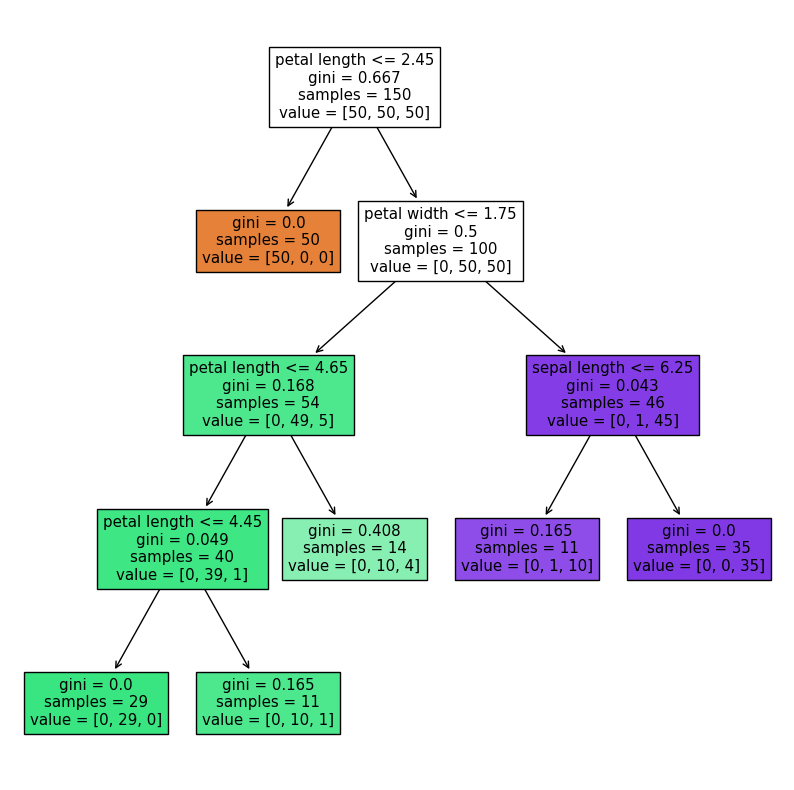

In [8]:
dataset = load_iris()
X = dataset.data
y = dataset.target

classifier = tree.DecisionTreeClassifier(criterion="gini",
                                         max_depth=4, min_samples_leaf=10)
classifier.fit(X,y)
fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(classifier,ax=ax, feature_names=["sepal length", "sepal width",
                                                "petal length", "petal width"],
                                                 filled=True)
plt.show()

## Decision tree for classification

- Gini
- Entropy
- Vote
- Phân loại dữ liệu sao cho độ tin cậy để xác định dữ liệu thuộc về 1 feature nào đó cao nhất


In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [10]:
# Load the diabetes dataset
iris_X, iris_y = datasets.load_iris(return_X_y=True)

In [11]:
print(iris_X.shape)
print(iris_y.shape)

(150, 4)
(150,)


In [12]:
# Split train:test = 8:2
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [13]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Defining an object for DTC and fitting for whole dataset
dt_classifier = DecisionTreeClassifier(max_depth=3, 
                                       min_samples_leaf=10, 
                                       random_state=1,
                                       criterion='entropy')
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       random_state=1)

In [15]:
y_pred = dt_classifier.predict(X_test)

In [16]:
accuracy_score(y_test, y_pred)

0.9666666666666667

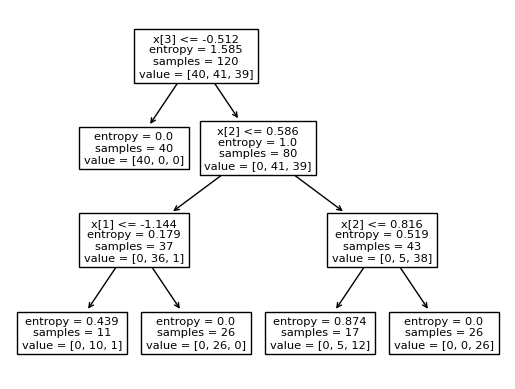

In [17]:
from sklearn import tree

tree.plot_tree(dt_classifier)
plt.show()

In [18]:
# Load libraries
import numpy as np
import pandas as pd
from sklearn import metrics

In [19]:
df=pd.read_csv("../source/Play Tennis.csv")
value=['Outlook','Temprature','Humidity','Wind']
df

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [20]:
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder() #encode your data
df=df.apply(string_to_int.fit_transform) #fit and transform it
df

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1
5,10,1,0,1,0,0
6,11,0,0,1,0,1
7,12,2,2,0,1,0
8,13,2,0,1,1,1
9,1,1,2,1,1,1


In [21]:
#To divide our data into attribute set and Label:
feature_cols = ['Outlook','Temprature','Humidity','Wind']
X = df[feature_cols]
y = df.Play_Tennis

In [22]:
# perform training 
from sklearn.tree import DecisionTreeClassifier                             
classifier =DecisionTreeClassifier(criterion="entropy", random_state=100)
classifier.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=100)

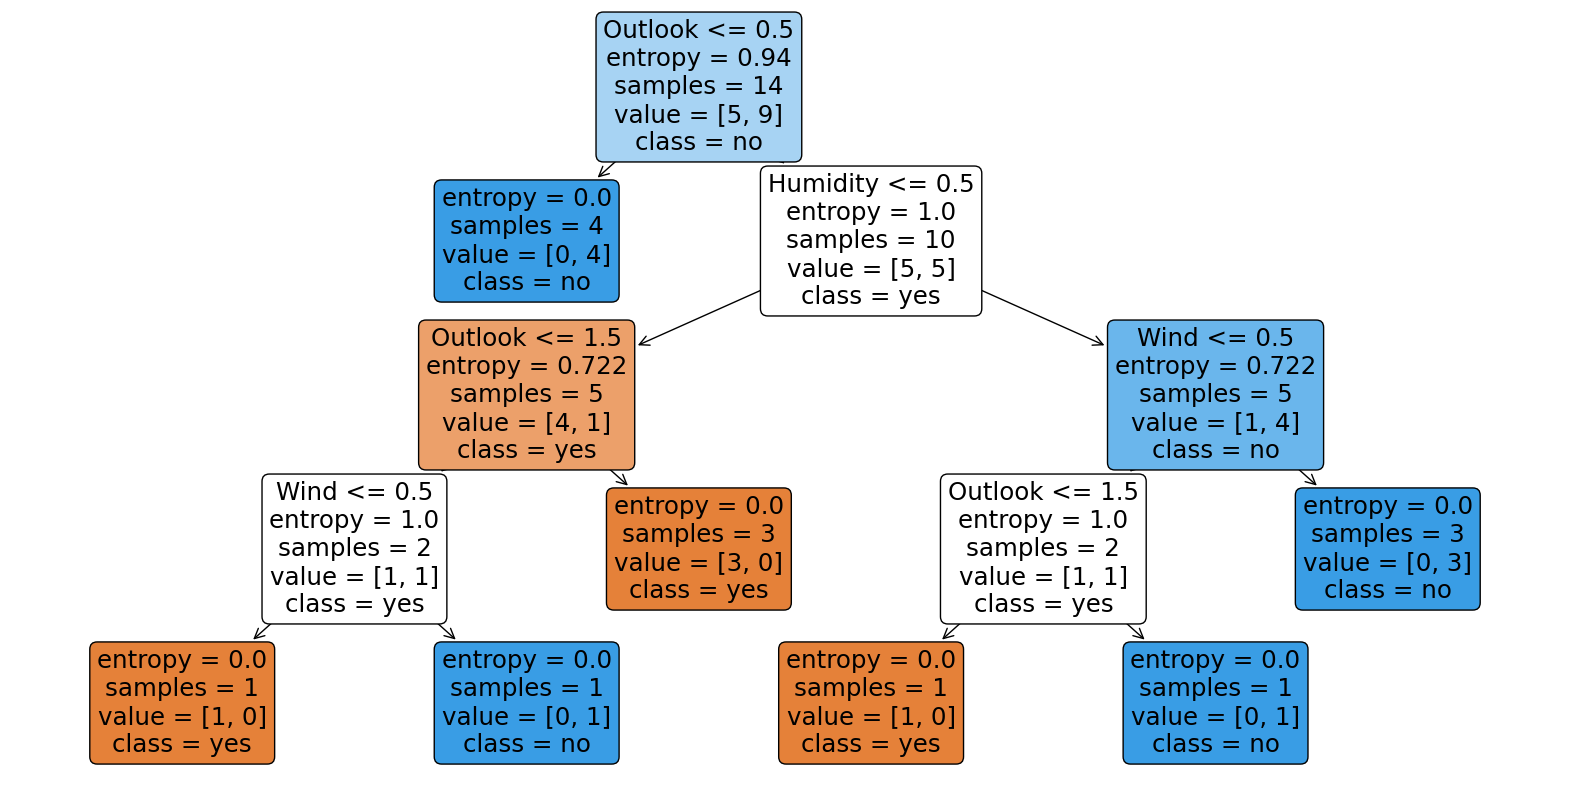

In [23]:
import matplotlib.pyplot as plt
from sklearn import tree

# Plot the tree
plt.figure(figsize=(20, 10))
tree.plot_tree(classifier, filled=True, feature_names=feature_cols, class_names=['yes', 'no'], rounded=True)
plt.show()

In [24]:
import dtreeviz

viz_model = dtreeviz.model(classifier,
                           X_train=X, y_train=y,
                           feature_names=['Outlook','Temprature','Humidity','Wind'],
                           target_name='Play_Tennis')

v = viz_model.view()     # render as SVG into internal object 
v.show()                 # pop up window
#v.save("iris.svg")  # optionally save as svg

c:\Users\vanna\.conda\envs\.env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


## Decision tree for regression

- Bài toán về regression là chia nhỏ dữ liệu và tính trung bình của đoạn dữ liệu đó sao cho đường đại diện cho đoạn dữ liệu có độ lệch trung bình nhỏ tốt nhất, đại diện tối ưu nhất cho đoạn dữ liệu đó.
- Tìm ngưỡng của dataset
  - Từ trái qua phải, ta lấy 2 điểm liền kề đầu tiên và lấy giá trị trung bình của 2 điểm đó (ở đây trung bình sẽ là 3)
  - Từ trung bình ở trên, ta đã chia dữ liệu thành 2 phần trái và phải. Tiếp theo ta tiến hành lấy giá trị trung bình của mỗi phía
  - Theo dataset ta có được trung bình bên trái là 0, trung bình bên phải sẽ là 38.8
  - Ta đã có được 1 thành phần cây: nếu Unit < 3 thì hiệu quả sẽ = 0, ngược lại hiệu quả đạt 38.8
  - Tiến hành đánh giá độ chính xác của cây: SSR (sum of squared residuals) = tổng bình phương của hiệu giá trị thực tế với giá trị dự đoán
  $$SSR = \sum_{i = 1}^{n} (Y_i - \hat{Y}_i)^2$$
  - Ta lần lượt đánh giá độ chính xác của từng phần
  - Cuối cùng ta tính được tổng SSR 2 nhánh của cây
  - Lưu ý rằng tổng SSR hiện tại chỉ là 1 cây đầu tiên, ta phải tiếp tục thực hiện tính tổng SSR của các trường hợp khác và đánh giá tiếp để lấy trường hợp tối ưu nhất.
  - Ta tiếp tục đi tính trung bình 2 điểm tiếp theo trong bộ dữ liệu
  - Đường trung bình chia dữ liệu thành 2 phần, bên trái và bên phải. Ta tiến hành thực hiện tính giá trị trung bình của bên trái và bên phải, tính SSR của từng phần của tổng giá trị của SSR của cây
  - Quá trình này được lặp qua tất cả các điểm của data, với mỗi 1 ngưỡng (trung bình của 2 điểm) ta sẽ có được giá trị SSR của cây. Cuối cùng ta được 1 ngưỡng có SSR nhỏ nhất chính là ngưỡng tốt nhất của cây
  - Sau khi tìm được ngưỡng tốt nhất, ta được 2 nhánh của cây
  - Tiến hành thực hiện tìm ngưỡng tối ưu nhất đối với từng nhánh của cây tương tự như data ban đầu. Việc tìm ngưỡng ở đây sẽ áp dụng đối với từng nhánh của cây sau khi đã được tách
  - Quá trình lại tiếp tục lặp đi lặp lại đối với từng ngưỡng, từng nhánh của cây do ngưỡng phân tách
- Điểm dừng của vòng lặp:
  - Underfit: là hiện tượng mô hình Machine Learning hoặc Deep Learning không học được đủ kiến thức từ dữ liệu huấn luyện và không đạt được hiệu suất tốt trên cả tập huấn luyện và tập kiểm tra (high bias or low variance)
  - Good Fit: là nằm giữa Underfitting và Overfitting. Mô hình cho ra kết quả hợp lý với cả tập dữ liệu huấn luyện và các tập dữ liệu mới. Đây là mô hình lý tưởng mang được tính tổng quát và khớp được với nhiều dữ liệu mẫu và cả các dữ liệu mới.
  - Overfit: là mô hình rất hợp lý, rất khớp với tập huấn luyện nhưng khi đem ra dự đoán với dữ liệu mới thì lại không phù hợp. Nguyên nhân có thể do ta chưa đủ dữ liệu để đánh giá hoặc do mô hình của ta quá phức tạp. Mô hình bị quá phức tạp khi mà mô hình của ta sử dụng cả những nhiễu lớn trong tập dữ liệu để học, dấn tới mất tính tổng quát của mô hình (high variance or low bias). Nếu kết quả training quá tốt đạt tỷ lệ 100% thì cần phải xem xét lại dataset vì rất có thể ta đang mắc phải trường hợp overfitting.
  - Để tránh overfitting thông thường ta sẽ giới hạn tổng số node (observation) tối đa để thực hiện tách tiếp là từ 8-20
- Prunning và Tree complexity penalty:
  - Tree score là độ phức tạp của cây
$$Tree\  score = sum \ of \ squared \ residuals + \alpha T$$
$$\text{\\alpha : là hệ số tính toán }  $$
$$\text{T: là tổng số lá của cây}$$
- Cho $\alpha = 0$ thì ta được giá trị tree score nhỏ nhất
- Khi ta bỏ bớt nhánh của cây, ta sẽ tính tree score với α tăng dần sao cho giá trị tree score mới tốt hơn tree score ban đầu
- Tiếp tục bỏ bớt nhánh và tăng giá trị α, có bao nhiêu cây được bỏ nhánh thì có bấy nhiêu giá trị α được xác định
- Sử dụng K fold chia dữ liệu thành dữ liệu train và dữ liệu test, dữ liệu được phân tách thành các fold, ta phải đi xây dựng cây theo giá trị $\alpha$ đã được xác định ở trên. Mục đích chia dữ liệu để tăng sự đa dạng cho dữ liệu để quá trình huấn luyện được diễn ra tốt hơn
- Lập bảng giá trị, tính giá trị trung bình theo từng giá trị α và chọn giá tri $\alpha$ tốt nhất

In [25]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#2 Importing the dataset
dataset = pd.read_csv('../source/position_salaries.csv')
print(dataset.head())
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values


            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [26]:
from sklearn.tree import DecisionTreeRegressor
regressor_max_depth_three = DecisionTreeRegressor(random_state=0, max_depth=3)
#Fit the regressor object to the dataset.
regressor_max_depth_three.fit(X,y)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [27]:
regressor_min_samples_leaf_fourth = DecisionTreeRegressor(random_state=0, min_samples_leaf=4)
#Fit the regressor object to the dataset.
regressor_min_samples_leaf_fourth.fit(X,y)

DecisionTreeRegressor(min_samples_leaf=4, random_state=0)

[Text(0.5909090909090909, 0.875, 'Level <= 8.5\nsquared_error = 80662250000.0\nsamples = 10\nvalue = 249500.0'),
 Text(0.36363636363636365, 0.625, 'Level <= 6.5\nsquared_error = 6921484375.0\nsamples = 8\nvalue = 124375.0'),
 Text(0.18181818181818182, 0.375, 'Level <= 4.5\nsquared_error = 1381250000.0\nsamples = 6\nvalue = 82500.0'),
 Text(0.09090909090909091, 0.125, 'squared_error = 179687500.0\nsamples = 4\nvalue = 58750.0'),
 Text(0.2727272727272727, 0.125, 'squared_error = 400000000.0\nsamples = 2\nvalue = 130000.0'),
 Text(0.5454545454545454, 0.375, 'Level <= 7.5\nsquared_error = 2500000000.0\nsamples = 2\nvalue = 250000.0'),
 Text(0.45454545454545453, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 200000.0'),
 Text(0.6363636363636364, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 300000.0'),
 Text(0.8181818181818182, 0.625, 'Level <= 9.5\nsquared_error = 62500000000.0\nsamples = 2\nvalue = 750000.0'),
 Text(0.7272727272727273, 0.375, 'squared_error = 0.0\nsamples = 1\nvalu

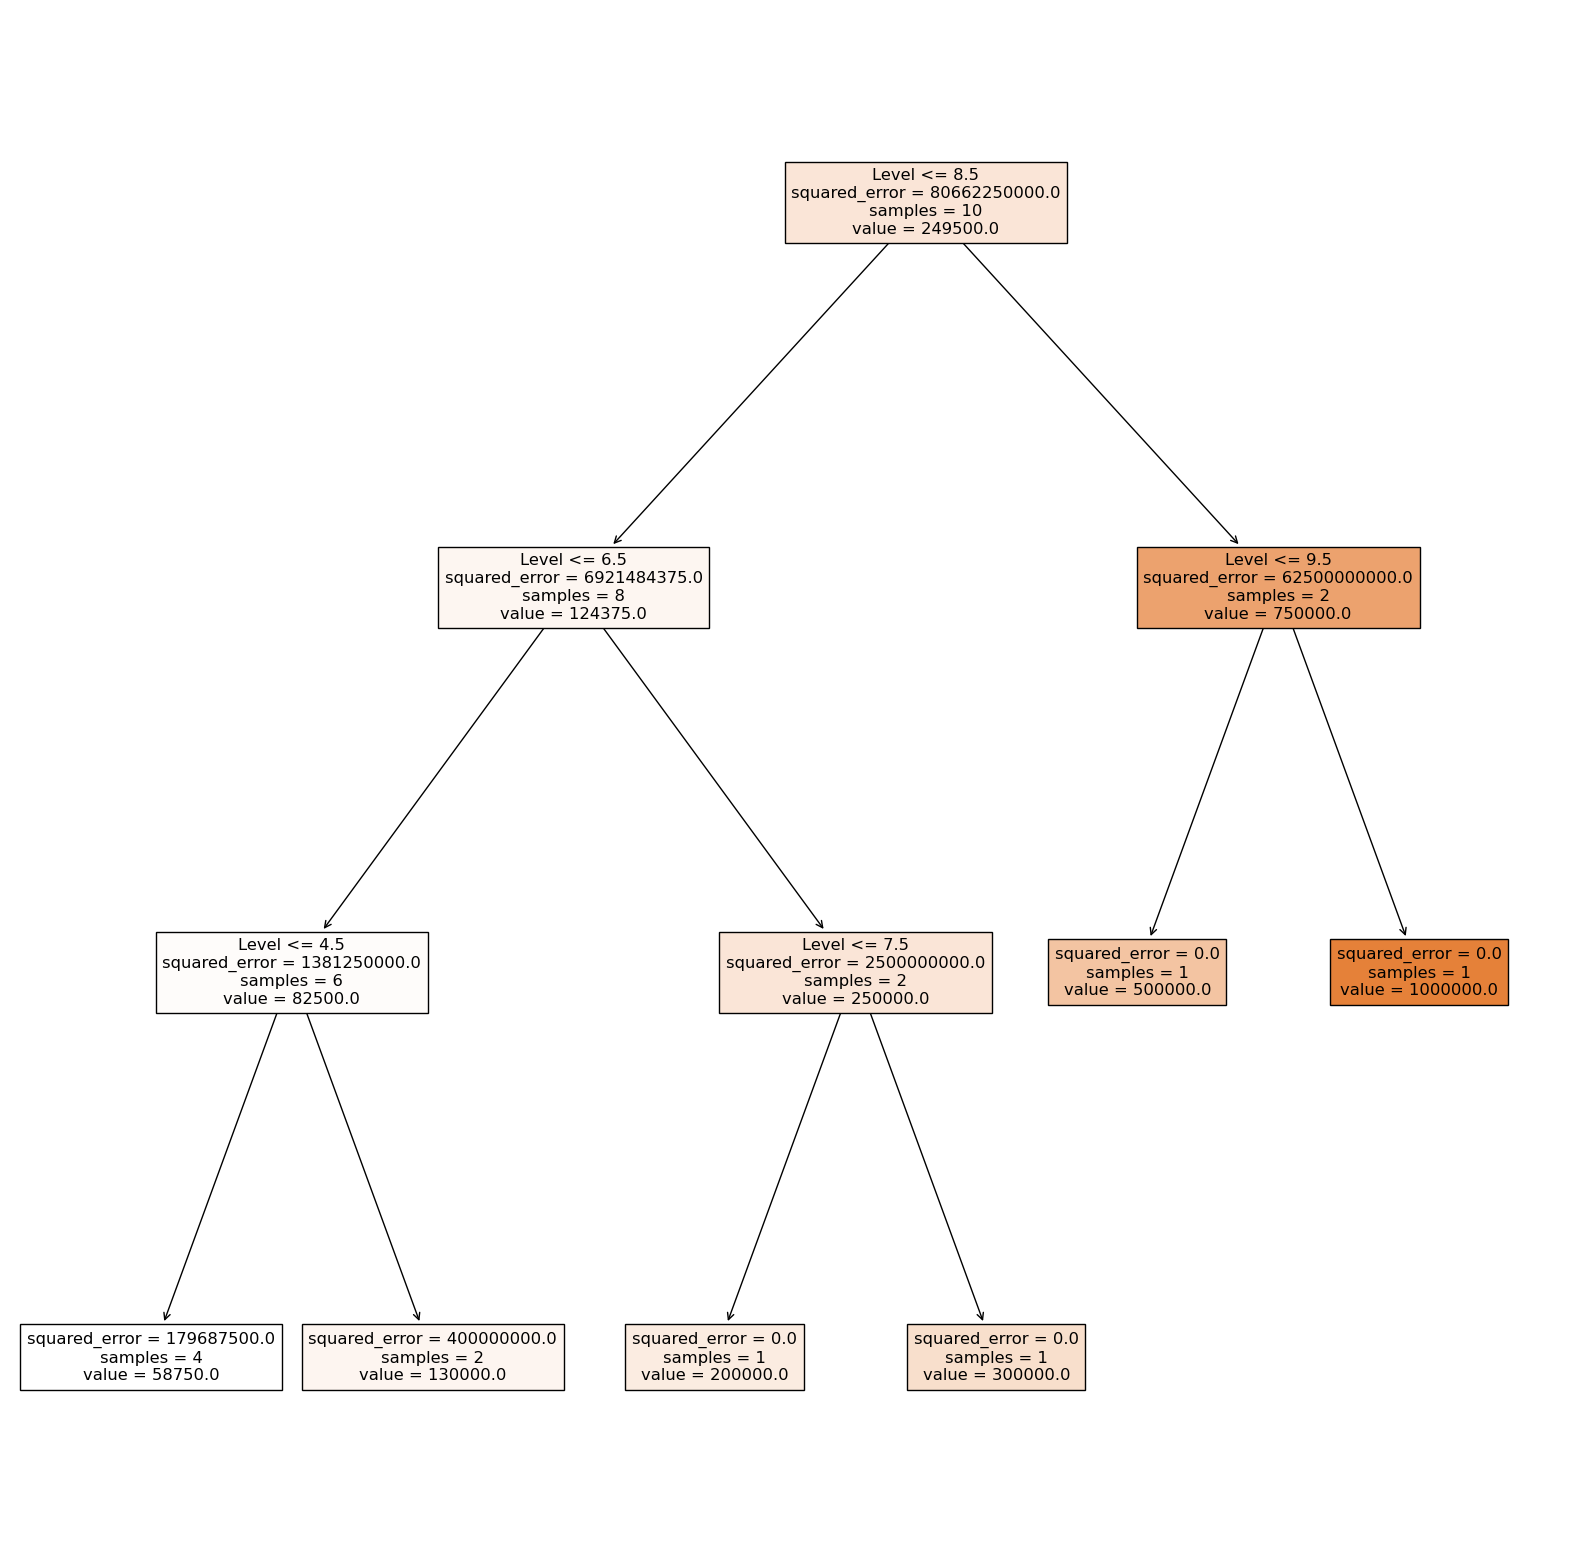

In [28]:
from sklearn import tree
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(20,20))
tree.plot_tree(regressor_max_depth_three, ax=ax, feature_names = ["Level"], filled=True)

In [29]:
# import export_graphviz
from sklearn.tree import export_graphviz

# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor_max_depth_three, out_file ='tree.dot',
               feature_names =["Level"])

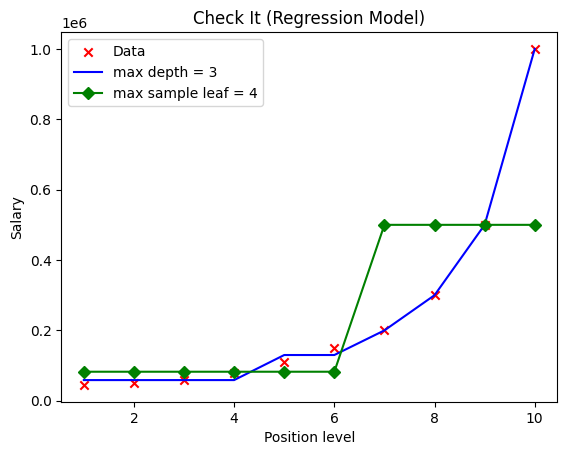

In [30]:
#5 Visualising the Decision Tree Regression results
plt.figure()
plt.scatter(X, y, marker= "x", color = 'red', label = "Data")
plt.plot(X, regressor_max_depth_three.predict(X), color = 'blue', label = "max depth = 3")
plt.plot(X, regressor_min_samples_leaf_fourth.predict(X), marker= "D", color = 'green', label = "max sample leaf = 4")
plt.title('Check It (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import matplotlib

In [32]:
df = pd.read_csv('../source/Salary_Data_simple.csv')
df

,Experience,Salary
0,1.0,0.0
1,1.5,0.0
2,2.0,0.0
3,2.5,0.0
4,3.0,60.0
5,3.5,64.0
6,4.0,55.0
7,4.5,61.0
8,5.0,66.0
9,5.5,83.0


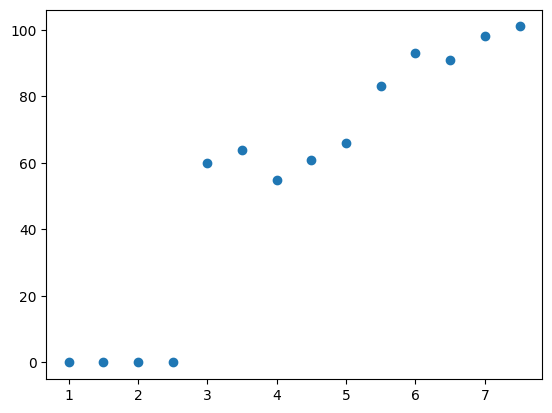

In [33]:
plt.scatter(x = df['Experience'], y = df['Salary'])

In [34]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=4)
y_test

4    60.0
Name: Salary, dtype: float64

In [35]:
dt_regressor = DecisionTreeRegressor(max_depth=2)
dt_regressor.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [36]:
y_pred_train = dt_regressor.predict(X)
r2_score(X, y)

-951.5406593406593

In [37]:
y_pred = dt_regressor.predict(X_test)
r2_score(y_test, y_pred)

c:\Users\vanna\.conda\envs\.env\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.


nan

In [38]:
from sklearn import tree

text_representation = tree.export_text(dt_regressor)
print(text_representation)

|--- feature_0 <= 2.75
|   |--- value: [0.00]
|--- feature_0 >  2.75
|   |--- feature_0 <= 5.25
|   |   |--- value: [61.20]
|   |--- feature_0 >  5.25
|   |   |--- value: [93.20]



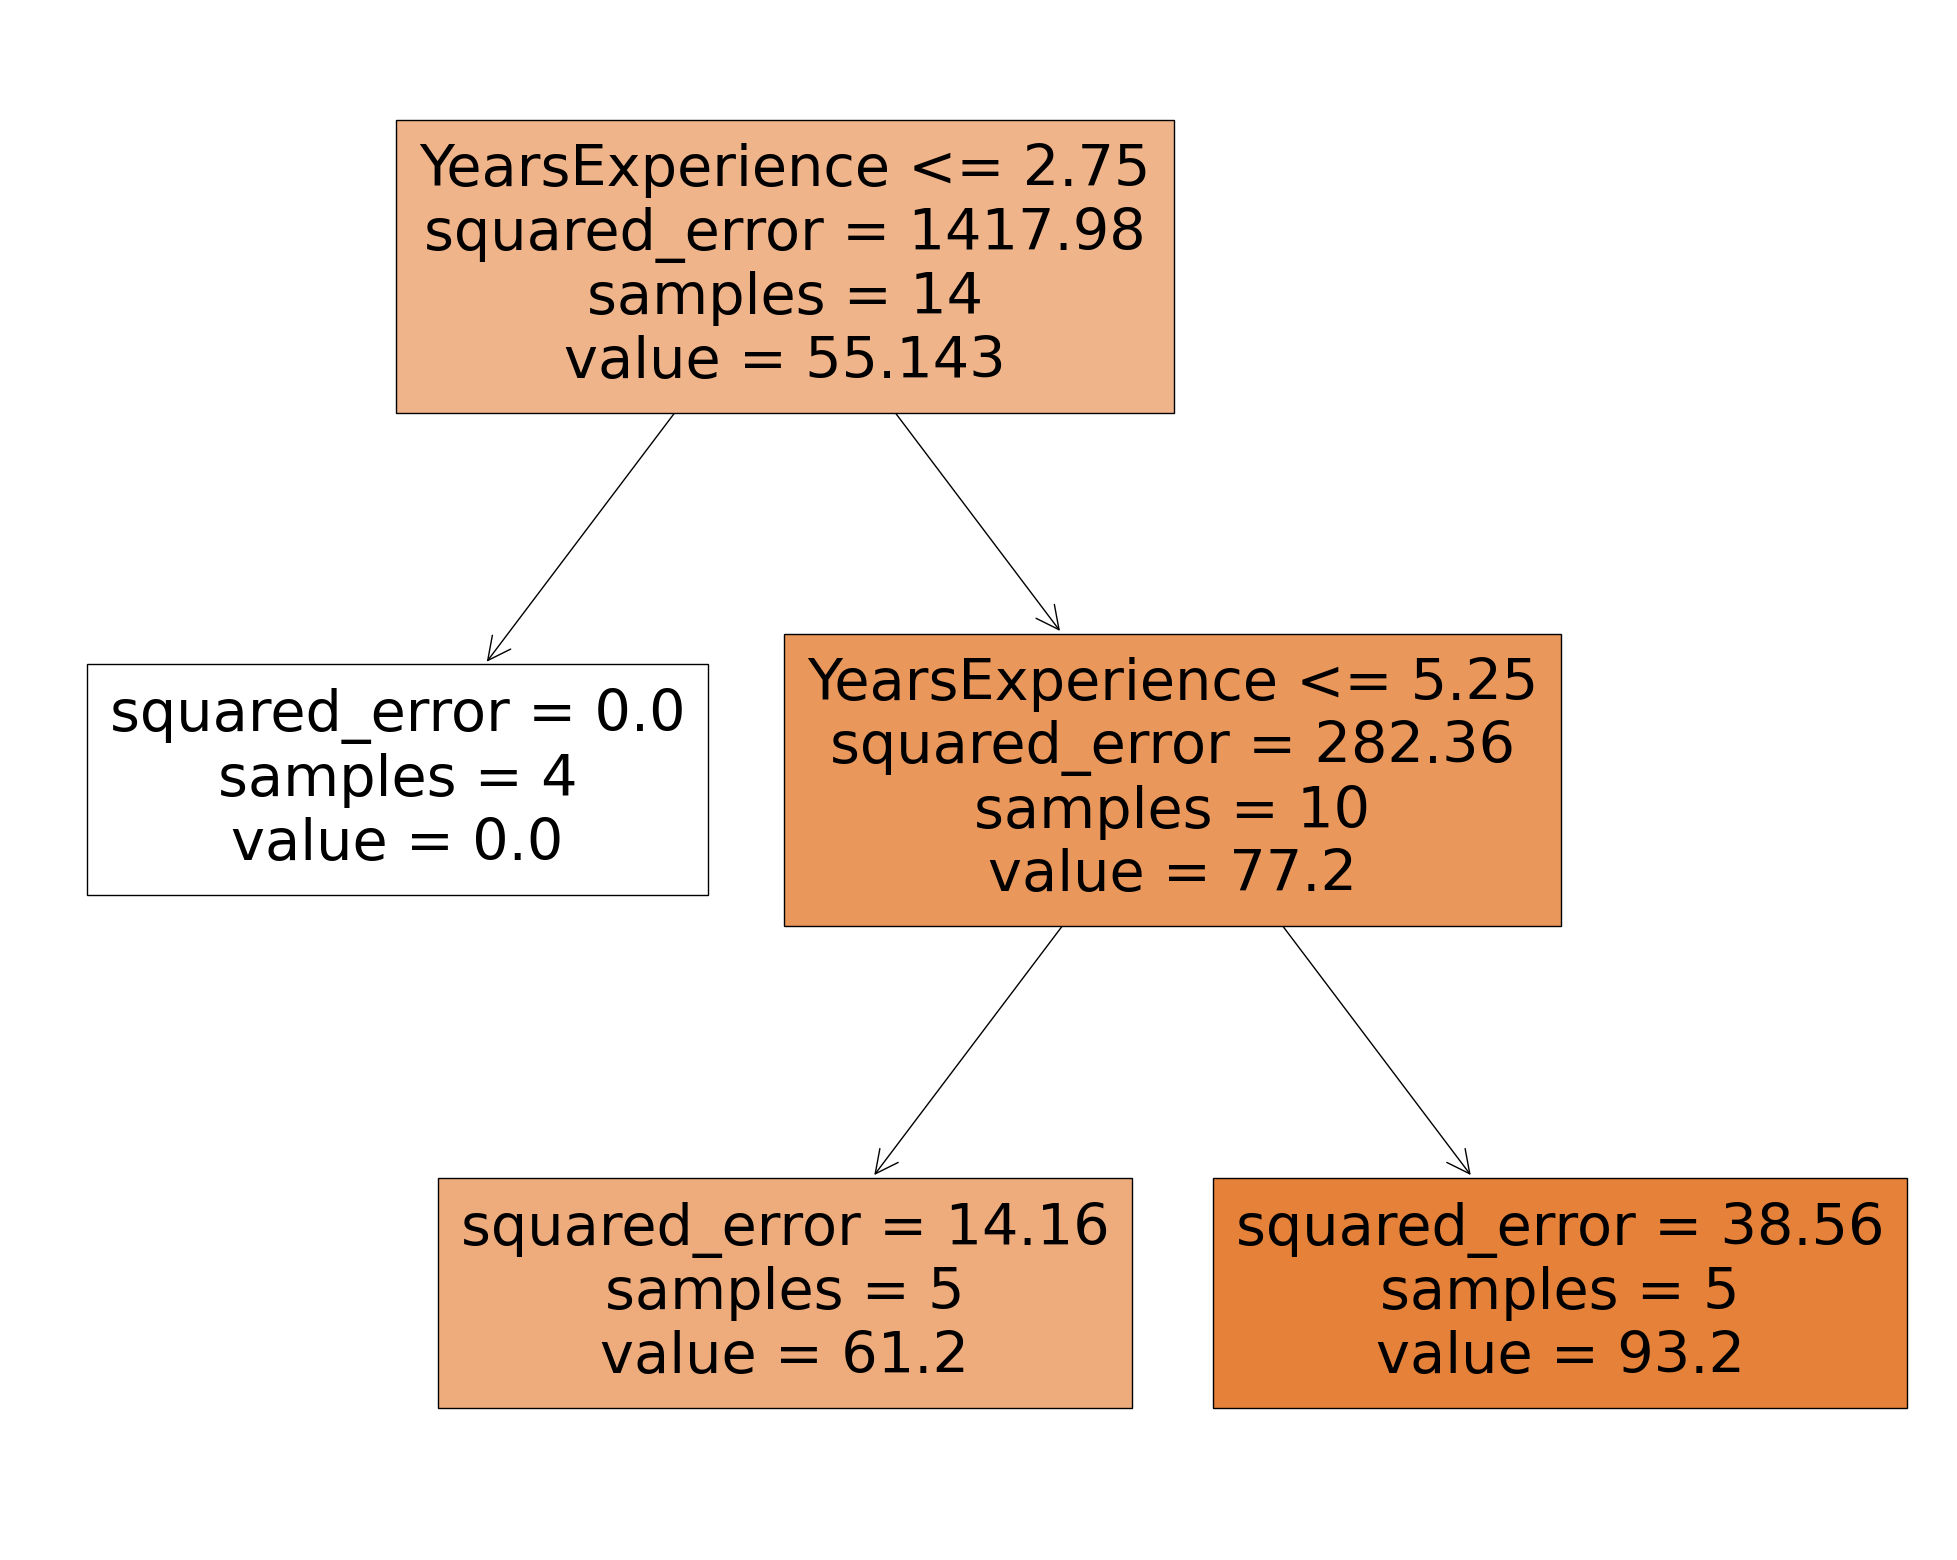

In [39]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_regressor, feature_names=['YearsExperience'], filled=True)

In [40]:
import dtreeviz 

viz = dtreeviz.model(dt_regressor, X, y,
                target_name="target",
                feature_names=['YearsExperience'])
v = viz.view()     # render as SVG into internal object 
v.show()              # pop up window

c:\Users\vanna\.conda\envs\.env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


c:\Users\vanna\.conda\envs\.env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


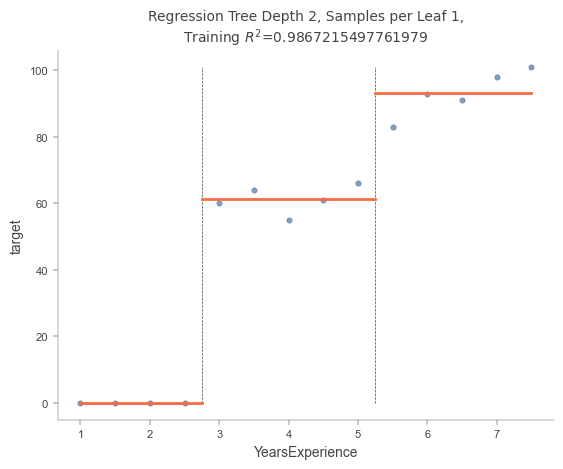

In [41]:
viz.rtree_feature_space(features=['YearsExperience'])

In [42]:
data = y.to_numpy()
data

array([  0.,   0.,   0.,   0.,  60.,  64.,  55.,  61.,  66.,  83.,  93.,
        91.,  98., 101.])

In [43]:
def compute_mse(data):
    data_mean = data.mean()
    diff = (data - data_mean)**2
    mse = diff.sum()/data.size
    return mse

for i in range(1, 14):
    print(f'for i={i}')
    left = data[:i]
    right = data[i:]
    print(left, 'mse:', compute_mse(left), '    mean:', left.mean())
    print(right, 'mse:', compute_mse(right), '    mean:', right.mean())
    average_mse = compute_mse(left)*(left.size/data.size) + compute_mse(right)*(right.size/data.size)
    print('average_mse:', average_mse)
    
    print('\n')

for i=1
[0.] mse: 0.0     mean: 0.0
[  0.   0.   0.  60.  64.  55.  61.  66.  83.  93.  91.  98. 101.] mse: 1275.1597633136096     mean: 59.38461538461539
average_mse: 1184.0769230769233


for i=2
[0. 0.] mse: 0.0     mean: 0.0
[  0.   0.  60.  64.  55.  61.  66.  83.  93.  91.  98. 101.] mse: 1063.0555555555557     mean: 64.33333333333333
average_mse: 911.1904761904763


for i=3
[0. 0. 0.] mse: 0.0     mean: 0.0
[  0.  60.  64.  55.  61.  66.  83.  93.  91.  98. 101.] mse: 749.2396694214876     mean: 70.18181818181819
average_mse: 588.6883116883117


for i=4
[0. 0. 0. 0.] mse: 0.0     mean: 0.0
[ 60.  64.  55.  61.  66.  83.  93.  91.  98. 101.] mse: 282.35999999999996     mean: 77.2
average_mse: 201.68571428571425


for i=5
[ 0.  0.  0.  0. 60.] mse: 576.0     mean: 12.0
[ 64.  55.  61.  66.  83.  93.  91.  98. 101.] mse: 277.20987654320993     mean: 79.11111111111111
average_mse: 383.92063492063494


for i=6
[ 0.  0.  0.  0. 60. 64.] mse: 855.5555555555553     mean: 20.6666666666666

In [44]:
left.size/data.size

0.9285714285714286

In [45]:
y_mean = y.mean()
print('Mean:', y_mean)

diff = (y - y_mean)**2
mse = diff.sum()/14
print('mse:', mse)

Mean: 55.142857142857146
mse: 1417.9795918367347
